# <span style="color:green;font-style:italic;text-align: center" >Visualizing top 2000 movies from IMDb dataset as of November 2021</span>


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import re
import matplotlib.pyplot as plt
%matplotlib inline

import chart_studio.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

from wordcloud import WordCloud

import os

###### Reading the dataset

In [2]:
data = pd.read_csv("IMDb_movies_dataset.csv")

## <span style="color:blue;font-style:italic;text-align: center" >Analysis of the dataset</span>

###### Printing the attributres in our movie data set 

In [3]:
data.columns

Index(['name', 'year', 'runtime', 'genres', 'IMDb_rating', 'IMDb_votes',
       'director', 'director_url', 'lead_actor', 'lead_actor_url',
       'certificate_category', 'IMDb_metascore', 'gross_collection'],
      dtype='object')

###### Getting the information about the data types of attributes

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  2066 non-null   object 
 1   year                  2066 non-null   object 
 2   runtime               2066 non-null   object 
 3   genres                2066 non-null   object 
 4   IMDb_rating           2066 non-null   float64
 5   IMDb_votes            2066 non-null   object 
 6   director              2066 non-null   object 
 7   director_url          2066 non-null   object 
 8   lead_actor            2066 non-null   object 
 9   lead_actor_url        2066 non-null   object 
 10  certificate_category  2063 non-null   object 
 11  IMDb_metascore        1124 non-null   float64
 12  gross_collection      1971 non-null   object 
dtypes: float64(2), object(11)
memory usage: 210.0+ KB


###### Analyzing the head of dataset

In [5]:
data.head()

,name,year,runtime,genres,IMDb_rating,IMDb_votes,director,director_url,lead_actor,lead_actor_url,certificate_category,IMDb_metascore,gross_collection
0,Jai Bhim,2021,164 min,"Crime, Drama",9.5,"142,015",T.J. Gnanavel,https://www.imdb.com/name/nm4377096/?ref_=adv_...,Suriya,https://www.imdb.com/name/nm1421814/?ref_=adv_...,NaN,NaN,NaN
1,The Shawshank Redemption,1994,142 min,Drama,9.3,"2,495,893",Frank Darabont,https://www.imdb.com/name/nm0001104/?ref_=adv_...,Tim Robbins,https://www.imdb.com/name/nm0000209/?ref_=adv_...,R,80.0,$28.34M
2,The Godfather,1972,175 min,"Crime, Drama",9.2,"1,721,252",Francis Ford Coppola,https://www.imdb.com/name/nm0000338/?ref_=adv_...,Marlon Brando,https://www.imdb.com/name/nm0000008/?ref_=adv_...,R,100.0,$134.97M
3,Soorarai Pottru,2020,153 min,Drama,9.1,"102,565",Sudha Kongara,https://www.imdb.com/name/nm1464314/?ref_=adv_...,Suriya,https://www.imdb.com/name/nm1421814/?ref_=adv_...,TV-MA,NaN,NaN
4,The Dark Knight,2008,152 min,"Action, Crime, Drama",9.0,"2,446,825",Christopher Nolan,https://www.imdb.com/name/nm0634240/?ref_=adv_...,Christian Bale,https://www.imdb.com/name/nm0000288/?ref_=adv_...,PG-13,84.0,$534.86M


###### Analyzing the trail content of dataset

In [6]:
data.tail()

,name,year,runtime,genres,IMDb_rating,IMDb_votes,director,director_url,lead_actor,lead_actor_url,certificate_category,IMDb_metascore,gross_collection
2061,Batman & Robin,1997,125 min,"Action, Sci-Fi",3.8,"242,563",Joel Schumacher,https://www.imdb.com/name/nm0001708/?ref_=adv_...,Arnold Schwarzenegger,https://www.imdb.com/name/nm0000216/?ref_=adv_...,PG-13,NaN,$107.33M
2062,Catwoman,2004,104 min,"Action, Crime, Fantasy",3.4,"115,424",Pitof,https://www.imdb.com/name/nm0685759/?ref_=adv_...,Halle Berry,https://www.imdb.com/name/nm0000932/?ref_=adv_...,PG-13,NaN,$40.20M
2063,Meet the Spartans,2008,87 min,"Comedy, Fantasy",2.8,"106,411",Jason Friedberg,https://www.imdb.com/name/nm0294997/?ref_=adv_...,Aaron Seltzer,https://www.imdb.com/name/nm0783536/?ref_=adv_...,PG-13,NaN,$38.23M
2064,Epic Movie,2007,86 min,"Adventure, Comedy, Fantasy",2.4,"104,122",Jason Friedberg,https://www.imdb.com/name/nm0294997/?ref_=adv_...,Aaron Seltzer,https://www.imdb.com/name/nm0783536/?ref_=adv_...,PG-13,NaN,$39.74M
2065,Radhe,2021,135 min,"Action, Crime, Thriller",1.8,"173,525",Prabhu Deva,https://www.imdb.com/name/nm0222150/?ref_=adv_...,Salman Khan,https://www.imdb.com/name/nm0006795/?ref_=adv_...,TV-MA,NaN,NaN


In [7]:
data.index.name="index"
data.tail()

,name,year,runtime,genres,IMDb_rating,IMDb_votes,director,director_url,lead_actor,lead_actor_url,certificate_category,IMDb_metascore,gross_collection
index,,,,,,,,,,,,,
2061,Batman & Robin,1997,125 min,"Action, Sci-Fi",3.8,"242,563",Joel Schumacher,https://www.imdb.com/name/nm0001708/?ref_=adv_...,Arnold Schwarzenegger,https://www.imdb.com/name/nm0000216/?ref_=adv_...,PG-13,NaN,$107.33M
2062,Catwoman,2004,104 min,"Action, Crime, Fantasy",3.4,"115,424",Pitof,https://www.imdb.com/name/nm0685759/?ref_=adv_...,Halle Berry,https://www.imdb.com/name/nm0000932/?ref_=adv_...,PG-13,NaN,$40.20M
2063,Meet the Spartans,2008,87 min,"Comedy, Fantasy",2.8,"106,411",Jason Friedberg,https://www.imdb.com/name/nm0294997/?ref_=adv_...,Aaron Seltzer,https://www.imdb.com/name/nm0783536/?ref_=adv_...,PG-13,NaN,$38.23M
2064,Epic Movie,2007,86 min,"Adventure, Comedy, Fantasy",2.4,"104,122",Jason Friedberg,https://www.imdb.com/name/nm0294997/?ref_=adv_...,Aaron Seltzer,https://www.imdb.com/name/nm0783536/?ref_=adv_...,PG-13,NaN,$39.74M
2065,Radhe,2021,135 min,"Action, Crime, Thriller",1.8,"173,525",Prabhu Deva,https://www.imdb.com/name/nm0222150/?ref_=adv_...,Salman Khan,https://www.imdb.com/name/nm0006795/?ref_=adv_...,TV-MA,NaN,NaN


###### As the data such as runtime, IMDb_votes & gross_collection are stored as string we need to convert to numericals to analyze them

In [8]:
def remove_min(minutes):
    minutes = re.sub("[^0-9]", "", minutes)
    return minutes

data["runtime"] = data["runtime"].apply(remove_min)
data['runtime'].astype(str).astype(int)
data.loc[:8,["year","runtime","genres"]]
data['runtime'] = data['runtime'].astype(float, errors = 'raise')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  2066 non-null   object 
 1   year                  2066 non-null   object 
 2   runtime               2066 non-null   float64
 3   genres                2066 non-null   object 
 4   IMDb_rating           2066 non-null   float64
 5   IMDb_votes            2066 non-null   object 
 6   director              2066 non-null   object 
 7   director_url          2066 non-null   object 
 8   lead_actor            2066 non-null   object 
 9   lead_actor_url        2066 non-null   object 
 10  certificate_category  2063 non-null   object 
 11  IMDb_metascore        1124 non-null   float64
 12  gross_collection      1971 non-null   object 
dtypes: float64(3), object(10)
memory usage: 210.0+ KB


In [9]:
data['IMDb_votes'] = data["IMDb_votes"].replace(",", "", regex=True)
data['IMDb_votes'] = data['IMDb_votes'].astype(str).astype(float, errors = 'raise')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  2066 non-null   object 
 1   year                  2066 non-null   object 
 2   runtime               2066 non-null   float64
 3   genres                2066 non-null   object 
 4   IMDb_rating           2066 non-null   float64
 5   IMDb_votes            2066 non-null   float64
 6   director              2066 non-null   object 
 7   director_url          2066 non-null   object 
 8   lead_actor            2066 non-null   object 
 9   lead_actor_url        2066 non-null   object 
 10  certificate_category  2063 non-null   object 
 11  IMDb_metascore        1124 non-null   float64
 12  gross_collection      1971 non-null   object 
dtypes: float64(4), object(9)
memory usage: 210.0+ KB


###### Converting gross collection data to numericals

In [10]:

data['gross_collection'].astype(str)
data['gross_collection'] = data["gross_collection"].str.replace('$','',regex=True)
data['gross_collection'] = data["gross_collection"].str.replace('M','',regex=True)
data.loc[:8,["certificate_category","IMDb_metascore","gross_collection"]]
data['gross_collection'] = data['gross_collection'].astype(float, errors = 'raise')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2066 entries, 0 to 2065
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  2066 non-null   object 
 1   year                  2066 non-null   object 
 2   runtime               2066 non-null   float64
 3   genres                2066 non-null   object 
 4   IMDb_rating           2066 non-null   float64
 5   IMDb_votes            2066 non-null   float64
 6   director              2066 non-null   object 
 7   director_url          2066 non-null   object 
 8   lead_actor            2066 non-null   object 
 9   lead_actor_url        2066 non-null   object 
 10  certificate_category  2063 non-null   object 
 11  IMDb_metascore        1124 non-null   float64
 12  gross_collection      1971 non-null   float64
dtypes: float64(5), object(8)
memory usage: 210.0+ KB


In [11]:
data.describe()

,runtime,IMDb_rating,IMDb_votes,IMDb_metascore,gross_collection
count,2066.000000,2066.000000,2.066000e+03,1124.000000,1971.000000
mean,115.684898,7.065924,2.795328e+05,75.386121,93.068752
std,21.533238,0.824921,2.486194e+05,9.942686,97.988945
min,64.000000,1.800000,1.001520e+05,61.000000,0.000000
25%,100.000000,6.500000,1.329210e+05,67.000000,31.010000
50%,113.000000,7.100000,1.932100e+05,74.000000,63.220000
75%,127.000000,7.700000,3.180790e+05,83.000000,125.325000
max,242.000000,9.500000,2.495893e+06,100.000000,936.660000


In [12]:
data1 = data.head(7) 
melted = pd.melt(frame=data1,id_vars = "name",value_vars=["genres"])
melted

,name,variable,value
0,Jai Bhim,genres,"Crime, Drama"
1,The Shawshank Redemption,genres,Drama
2,The Godfather,genres,"Crime, Drama"
3,Soorarai Pottru,genres,Drama
4,The Dark Knight,genres,"Action, Crime, Drama"
5,The Godfather: Part II,genres,"Crime, Drama"
6,12 Angry Men,genres,"Crime, Drama"


In [13]:
mean_of_IMDb_user_rating = data["IMDb_rating"].mean()
mean_of_IMDb_user_rating

data["vote_level"] = [ "high_level" if each>mean_of_IMDb_user_rating else "down_level"  for each in data.IMDb_rating]
data.loc[:2066,["name","vote_level","IMDb_rating"]] 

,name,vote_level,IMDb_rating
index,,,
0,Jai Bhim,high_level,9.5
1,The Shawshank Redemption,high_level,9.3
2,The Godfather,high_level,9.2
3,Soorarai Pottru,high_level,9.1
4,The Dark Knight,high_level,9.0
...,...,...,...
2061,Batman & Robin,down_level,3.8
2062,Catwoman,down_level,3.4
2063,Meet the Spartans,down_level,2.8


In [14]:
data2 = data[data.IMDb_rating > 9]
data2.loc[:,["name","IMDb_rating"]]

,name,IMDb_rating
index,,
0,Jai Bhim,9.5
1,The Shawshank Redemption,9.3
2,The Godfather,9.2
3,Soorarai Pottru,9.1


## <span style="color:blue;font-style:italic;text-align: center" >Visualizing the dataset</span>

### <span style="color:orange;text-align: center" >Bar Graphs</span>

Text(0.5, 1.0, 'Visualizing movies with same rating')

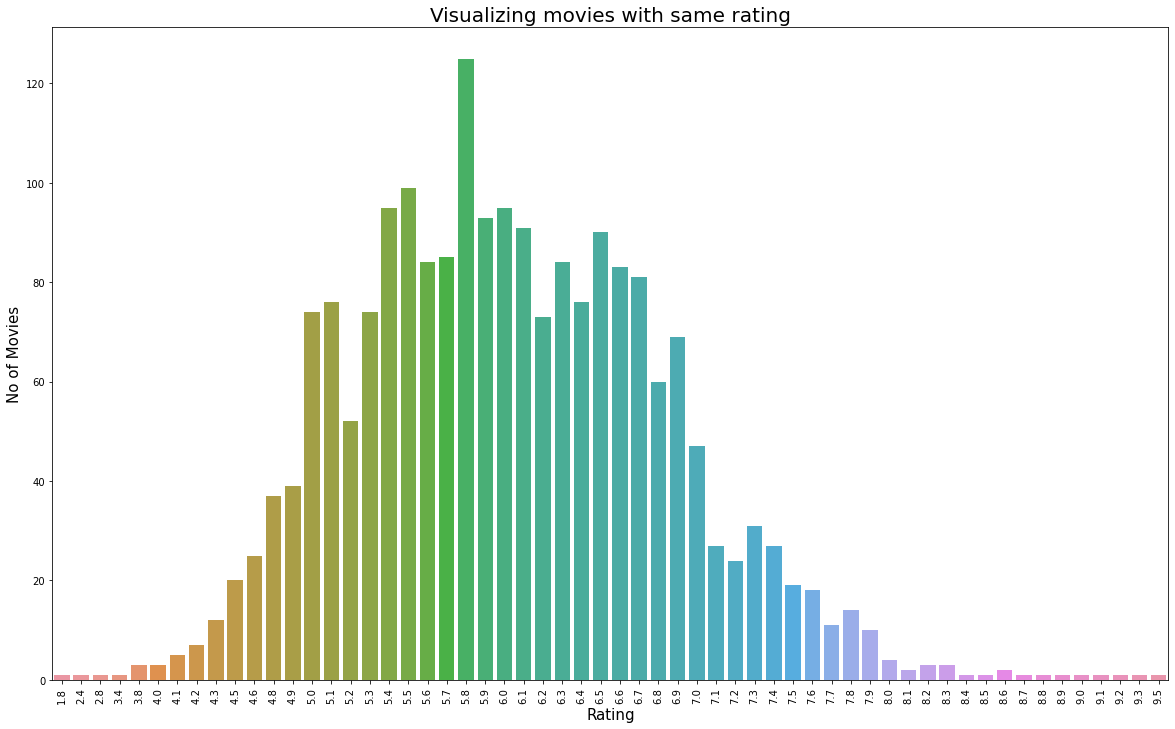

In [15]:
from collections import Counter

df=data.copy()
unique = list(df.IMDb_rating.unique())

list_ratio = df.pivot_table(columns=['IMDb_rating'], aggfunc='size')
# print(list_ratio)

df2 = pd.DataFrame({"Rating":unique,"No_of_movies":list_ratio})
new_index = (df2.No_of_movies.sort_values(ascending = False)).index.values
sorted_data= df2.reindex(new_index)

# #Visualization
plt.figure(figsize = (20,12))
sns.barplot(x= sorted_data["Rating"],y  = sorted_data["No_of_movies"])
plt.xticks(rotation=90)
plt.xlabel("Rating",fontsize=15)
plt.ylabel("No of Movies",fontsize= 15)
plt.title("Visualizing movies with same rating",fontsize= 20)

In [16]:
from collections import Counter

df = data.genres.copy()

list_kind = df.str.split(", ")
a = []
for each in list_kind:
    for i in each:
        a.append(i)
        
c=[]
for each in a:
    if each != "":
         c.append(each)        
        
f= dict(Counter(c))


df3 = pd.DataFrame(list(f.items()),columns = ["kind","ratio"])
new_index =( df3.ratio).index.values
new = df3.reindex(new_index)
order_c = df3.ratio.sort_values(ascending=True)

new

,kind,ratio
0,Crime,392
1,Drama,941
2,Action,784
3,Adventure,623
4,Biography,134
5,History,56
6,Sci-Fi,268
7,Romance,231
8,Western,14
9,War,31


Text(0.5, 1.0, 'Movie Genres')

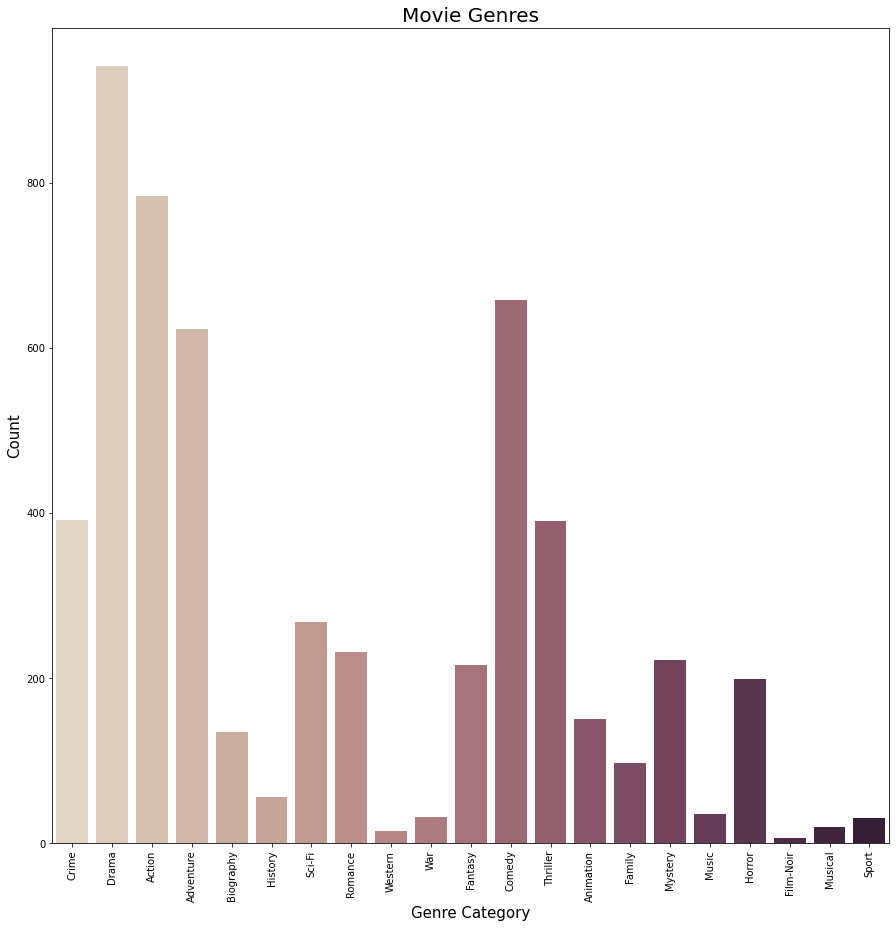

In [17]:
plt.figure( figsize = (15,15))
sns.barplot(x="kind",y="ratio",data=new, palette="ch:.25")
plt.xticks(rotation = 90)
plt.xlabel("Genre Category",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Movie Genres",fontsize = 20)

In [18]:
trace1 = go.Bar(
    x  = df3.kind,
    y = df3.ratio,
    name = "Ratio",
    marker = dict(
        color = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],
        colorscale = "Bluered")
)

data1= [trace1]
layout = dict( 
    autosize = False,
    width = 1000,
    height = 720,
    barmode = "group",)
fig  = dict (data = data1, layout = layout)
iplot ( fig)

### <span style="color:orange;text-align: center" >Line Graphs</span>

In [19]:
import plotly.graph_objs as go 

df = data.head(100).copy()

trace1 =go.Scatter(
    x =df.index,
    y = df.IMDb_rating,
    mode ="lines + markers",
    name = " Rating",
    marker = dict(color = "rgb(242, 99, 74,0.7)"),
    text = df.name,
)
trace2 = go.Scatter(
    x = df.index,
    y = df.runtime,
    mode = "lines + markers",
    name = "Runtime",
    marker = dict( color = "rgb(144, 211, 74,0.5)"),
    text = df.name
)
data1=[trace1,trace2]
layout = dict(title = "Runtime vs Rating", hovermode = "x",xaxis = {'showgrid' : False},yaxis = {'showgrid' : False},
             paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)')

fig = dict ( data = data1 , layout = layout)

iplot(fig)

### <span style="color:orange;text-align: center" >Scatter plots</span>

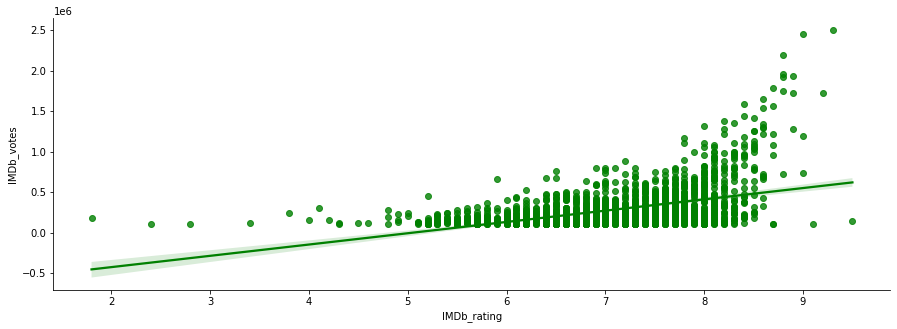

In [20]:
plt.figure( figsize = (15,5))
sns.regplot( x = data.IMDb_rating, y = data.IMDb_votes, color = "g" , data=data)
sns.despine()
plt.show()

In [21]:
df = data.head(200).copy()

trace1 = go.Scatter(
    x = df.index,
    y = df.IMDb_rating,
    mode = "markers",
    name = "Average Rating of movie in IMDb",
    marker =dict( color = "rgb(70,136,173)",size=5,
        ),
    text = df.name
)
trace2 = go.Scatter(
    x = df.index,
    y = df.IMDb_votes,
    mode ="markers",
    name = "Number of users who rated a movie",
    marker =dict (
        color = "rgb(168, 229, 183)",
        size = 10,
        line = dict(
            color = "rgb(57, 4, 57)",
            width = 2
        )
    ),
    text = df.name
)
data1 = [trace1,trace2]
layout = dict( title = " Average rating and Count of user votes",hovermode = "x",
              xaxis = {'showgrid' : False},yaxis = {'showgrid' : False},
             paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)')
fig = dict ( data = data1 , layout = layout)
iplot( fig)

### <span style="color:orange;text-align: center" >3D Scatter plot</span>

In [22]:

trace1=go.Scatter3d(
    x =data.name.head(100),
    y = data.IMDb_votes.head(100),
    z= data.IMDb_rating.head(100),
    mode = "markers",
    marker= dict(
        color= data.IMDb_rating.head(100),
        colorscale = "Viridis",
        size = 10
    )
)
data5 = [trace1]
layout = go.Layout(
    margin = dict (
        l=0,
        r=0,
        b=0,
        t=0
    )
)

fig = dict( data = data5,layout = layout)
iplot(fig)

### <span style="color:orange;text-align: center" >Combined plots/ Joint plots</span>

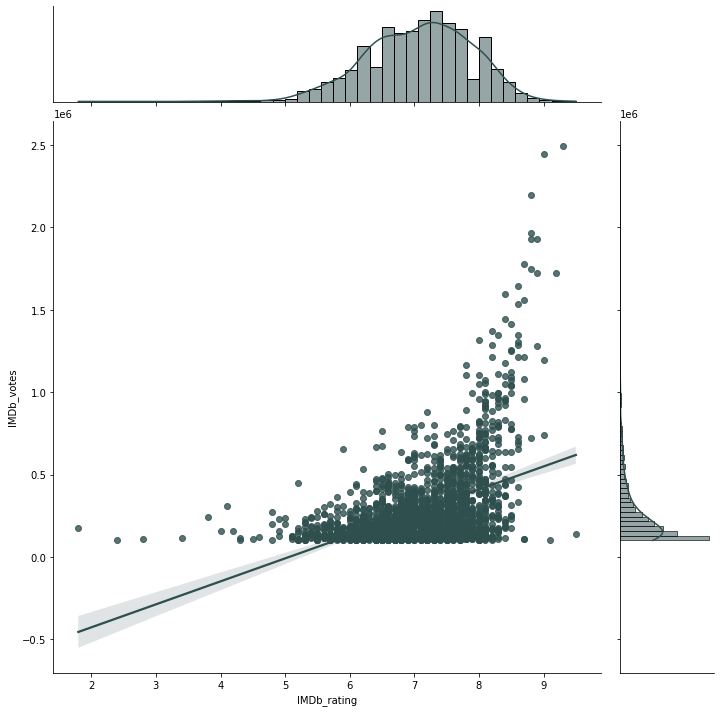

In [23]:
import scipy.stats as stats

pearsonreg = sns.jointplot(x = data.IMDb_rating , y = data.IMDb_votes,kind ="reg",color="DarkSlateGrey",height=10)
pearsonreg = sns.despine()
plt.show()

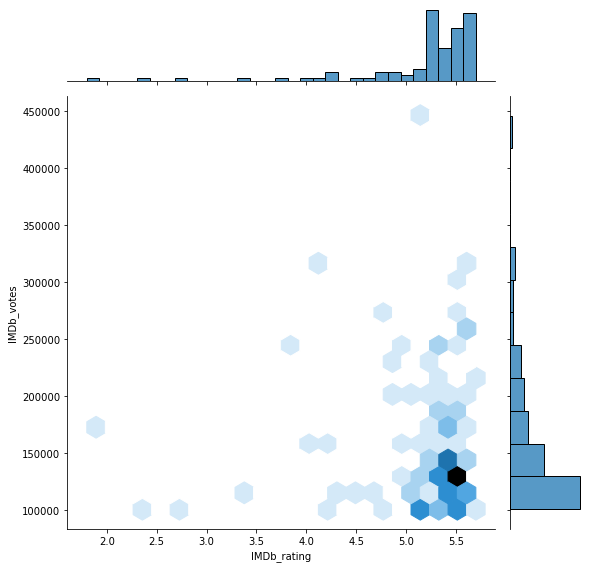

In [24]:
sns.jointplot(x = data.IMDb_rating.tail(100),y = data.IMDb_votes.tail(100),kind ="hex",height=8)
plt.show()

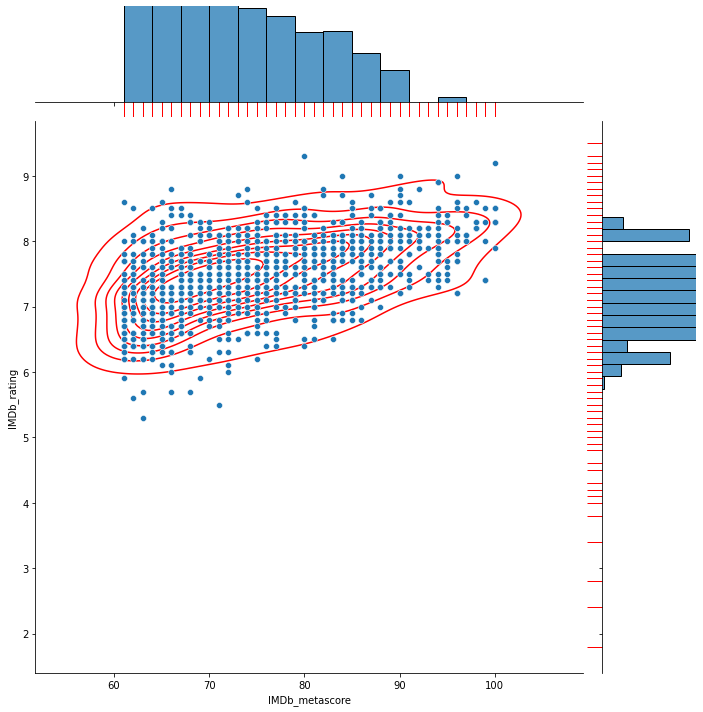

In [25]:
g = sns.jointplot(data=data, x="IMDb_metascore", y="IMDb_rating",height=10)
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=10)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

In [26]:
import plotly.figure_factory as ff
data1 = data.loc[:,["IMDb_rating","gross_collection"]]
data1["index"] = np.arange(1,len(data1)+1)


fig = ff.create_scatterplotmatrix(data1,diag= "box", index = "index",colormap = "Portland",colormap_type = "cat",
                                height = 800,width=1200)

iplot(fig)

### <span style="color:orange;text-align: center" >Pie Chart</span>

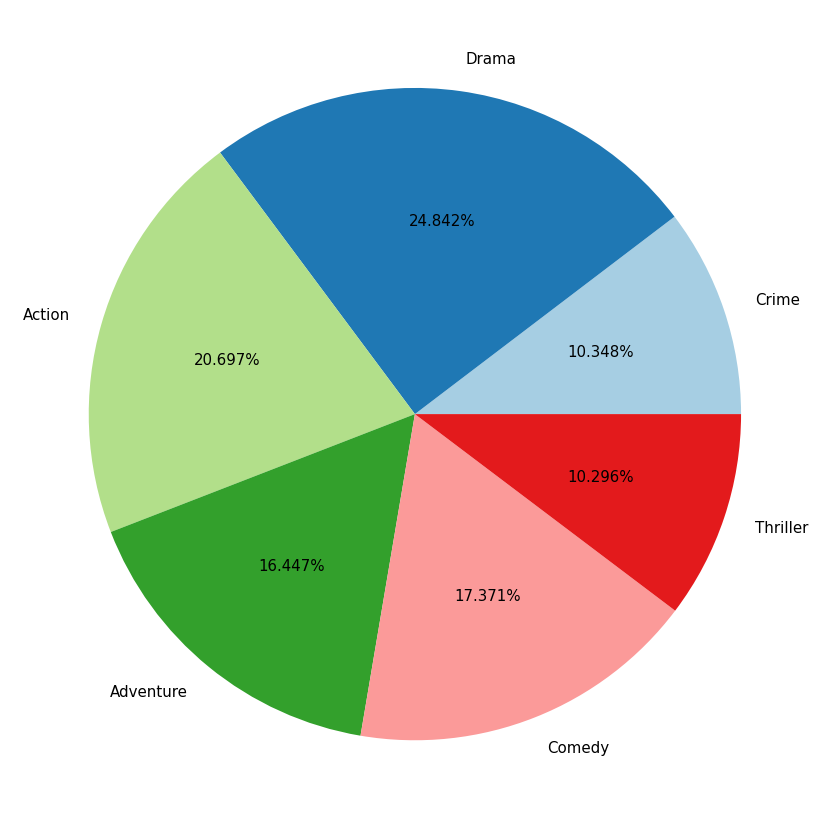

In [27]:
from collections import Counter

df = data.genres.copy()

list_kind = df.str.split(", ")
a = []
for each in list_kind:
    for i in each:
        a.append(i)
        

keys=[]
values=[]
c=[]   
        
f= dict(Counter(a))

for key,value in f.items() :
    if value > 300 and key != "":
        keys.append(key)
        values.append(value)

labels = keys
colors = sns.color_palette("Paired",6)
explode =[0,0,0,0,0,0]
sizes= values
    
plt.figure(figsize = (15,15))
plt.pie(sizes,explode = explode,labels=labels,colors = colors,autopct='%.3f%%',textprops= {"fontsize": 15},shadow = False)
plt.title=("Top 6 categories of Genres")
plt.show()

### <span style="color:orange;text-align: center" >Heatmaps</span>

In [28]:
data.corr()

,runtime,IMDb_rating,IMDb_votes,IMDb_metascore,gross_collection
runtime,1.000000,0.296527,0.314704,0.108212,0.185052
IMDb_rating,0.296527,1.000000,0.462967,0.513270,0.012312
IMDb_votes,0.314704,0.462967,1.000000,0.128917,0.452807
IMDb_metascore,0.108212,0.513270,0.128917,1.000000,-0.073461
gross_collection,0.185052,0.012312,0.452807,-0.073461,1.000000


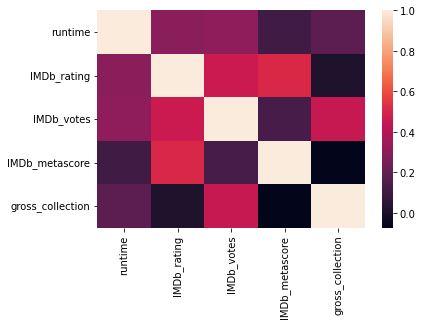

In [29]:
corr = data.corr()
sns.heatmap(corr)
plt.show()


<AxesSubplot:>

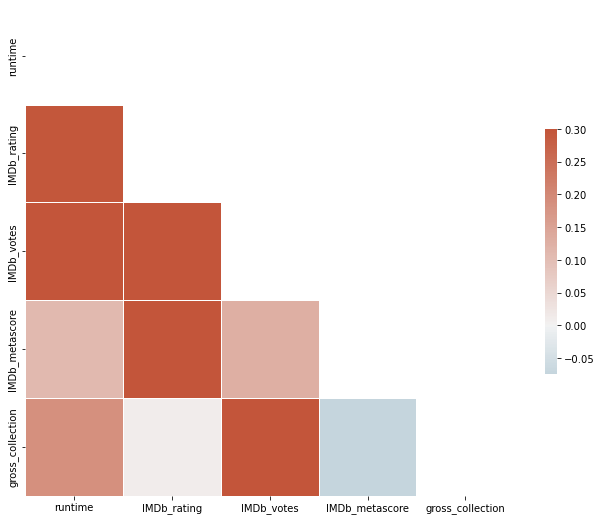

In [30]:

mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### <span style="color:orange;text-align: center" >Box Plot and Violin Graphs</span>

In [31]:
trace1= go.Box(
    x =data.IMDb_rating,
    name = "Average Rating",
    marker = dict ( color = "#666699"),
    
)


iplot([trace1])

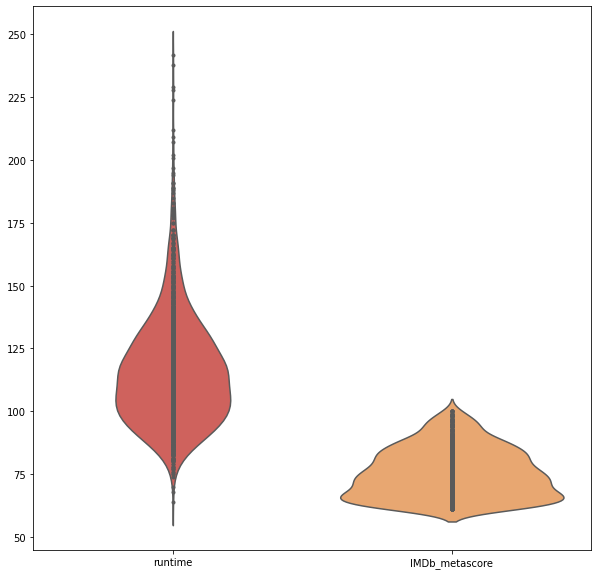

In [32]:
df = data.loc[:,["runtime","IMDb_metascore"]].copy()
plt.figure( figsize = (10,10))
sns.violinplot(data=df , palette = sns.color_palette("Spectral"),inner ="points")
plt.show()

In [33]:
import plotly.express as px

df4 = data["runtime"]
fig = px.violin(df4, y=data["IMDb_rating"],box=True)
fig.show()


### <span style="color:orange;text-align: center" >Histograms</span>

237    2014
238    2017
239    2013
240    2015
241    2010
       ... 
308    2018
309    2016
310    2016
311    2017
312    2019
Name: year, Length: 76, dtype: object


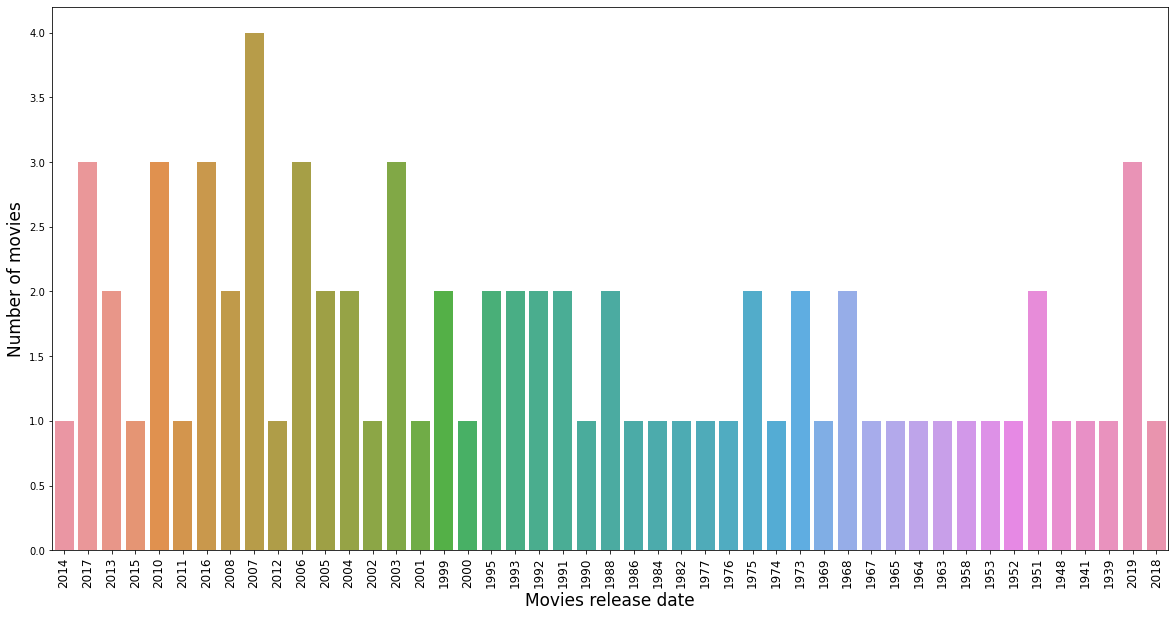

In [34]:
data5 = pd.read_csv("IMDb_movies_dataset.csv")
# Index of moives from 237 to 314(random)
last_ten_year_release_analysis = data5['year'].iloc[237:313]
plt.figure(figsize = (20,10))
print(last_ten_year_release_analysis)
sns.countplot(x = last_ten_year_release_analysis)
plt.xticks(rotation= 90,fontsize = 12)
plt.xlabel("Movies release date",fontsize =17)
plt.ylabel("Number of movies",fontsize = 17)
plt.show()

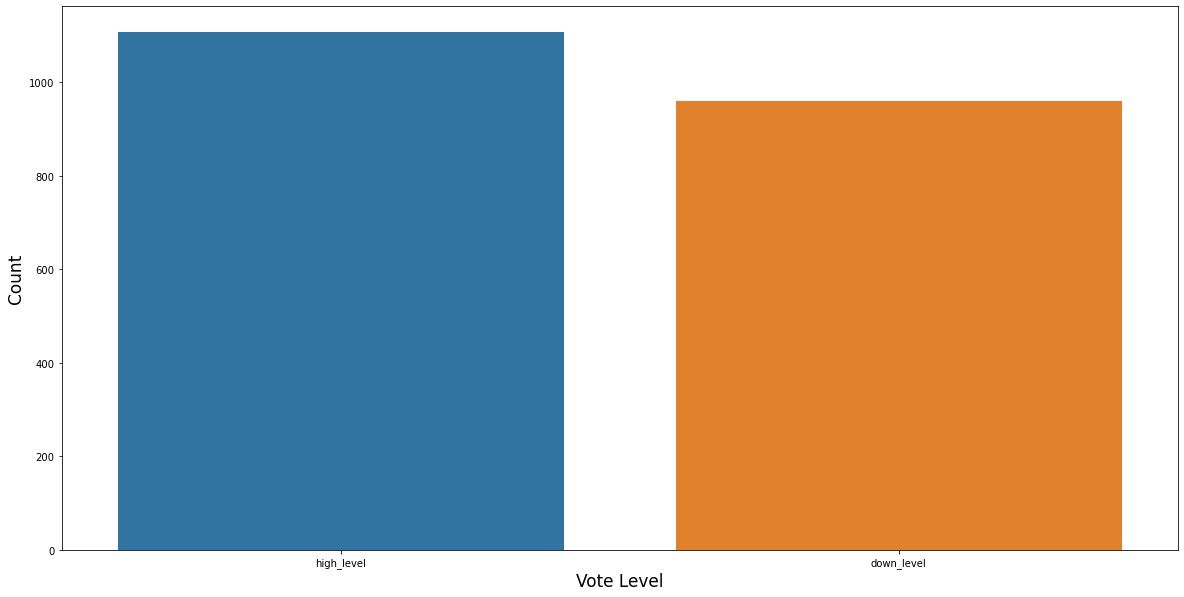

In [35]:
plt.figure(figsize = (20,10))
sns.countplot(x = data.vote_level)
plt.xlabel("Vote Level",fontsize =17)
plt.ylabel("Count",fontsize = 17)
plt.show()

In [36]:
trace1= go.Histogram(
    x = data5['year'].sort_values(ascending=True),
    marker = dict ( color = "yellowgreen")
)

layout1 = dict( title = "Comparision of moives released in each year",hovermode = "x",
              xaxis = {'showgrid' : False},yaxis = {'showgrid' : False},
             paper_bgcolor='rgba(0,0,0,0)',plot_bgcolor='rgba(0,0,0,0)')

data2 = [trace1]
fig =go.Figure( data = data2,layout = layout1)
iplot(fig)

### <span style="color:orange;text-align: center" >Word cloud</span>

In [37]:
from PIL import Image
names = data5['lead_actor'].value_counts()

mask = np.array(Image.open('movie-clip-icon.png'))
font_path = 'C:/Users/ekave/AppData/Local/Microsoft/Windows/Fonts/Comfortaa-Bold.ttf'
plt.subplots( figsize = (32,32))
wordcould = WordCloud(
    background_color= "white", mask = mask, font_path = font_path ,
    width= 2160,
    height = 720,
).generate_from_frequencies(names)
plt.imshow(wordcould)
plt.axis("off")
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'movie-clip-icon.png'

# <span style="color:green;font-style:italic;text-align: center" >Movie Recommendation</span>


## <span style="color:blue;font-style:italic;text-align: center" >Content Based and Popularity Based Recommendation</span>

In [ ]:
import numpy as np
import pandas as pd
import difflib
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
smallmoviesdataset = pd.read_csv('movies.csv')

### <span style="color:orange;text-align: center" >Selecting the required features from the dataset</span>

In [ ]:
select_features = ['genres','keywords','tagline','cast','director']
print(select_features)

### <span style="color:orange;text-align: center" >Replacing the null values with null strings</span>

In [ ]:
for feature in select_features:
    smallmoviesdataset[feature] = smallmoviesdataset[feature].fillna('')

### <span style="color:orange;text-align: center" >Combining the selected features</span>

In [ ]:
combined_features = smallmoviesdataset['genres']+' '+smallmoviesdataset['keywords']+' '+smallmoviesdataset['tagline']+' '+smallmoviesdataset['cast']+' '+smallmoviesdataset['director']

### <span style="color:orange;text-align: center" >Converting the text data to feature vectors</span>

In [ ]:
vectorizer = TfidfVectorizer()

In [ ]:
feature_vectors = vectorizer.fit_transform(combined_features)

### <span style="color:orange;text-align: center" >Getting the similarity scores using cosine similarity</span>

In [ ]:
similarity = cosine_similarity(feature_vectors)

In [ ]:
movie_name = input(' Enter your favourite movie name : ')

list_of_all_titles = smallmoviesdataset['title'].tolist()

find_close_match = difflib.get_close_matches(movie_name, list_of_all_titles)

close_match = find_close_match[0]

index_of_the_movie = smallmoviesdataset[smallmoviesdataset.title == close_match]['index'].values[0]

similarity_score = list(enumerate(similarity[index_of_the_movie]))

sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 

print('Movies suggested for you : \n')

i = 1

for movie in sorted_similar_movies:
    index = movie[0]
    title_from_index = smallmoviesdataset[smallmoviesdataset.index==index]['title'].values[0]
    if (i<11):
        print(i, '.',title_from_index)
        i+=1